In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

In [47]:
# The code was removed by Watson Studio for sharing.

## Removing the columns that are not going to be used

All the columns that does not add information for classifying the type of toilet, are going to be removed, like:

1. Inconclusive data (That has too many NA's)
2. Data not related to the labeling (Ex.: Date of Interview is not going to say if a toilet is clean or dirty)

In [48]:
Kanyama.drop(columns= ['DATE.OF.INTERVIEW',
                       'Region',
                       'Enough.space.another.toilet',
                       'People_on_the_plot',
                       'Water.source..fetch.',
                       'X1.9..latitude.', 'X1.9..longitude.',
                       'Age.of.toilet..Years...Age',
                       'Age.of.toilet.2..Years...Age', 'Age.of.toilet.3..Years...Age',
                       'What.happens.when.the.toilet.gets.full.', 'Toilet.emptying.time',
                       'Record.the.observed.shape.of.the.substructure.containment.', 'Width',
                       'Diameter', 'Length', 'Is.height.of.sludge.measurable.', 'Height',
                       'Is.emptying.feasible.', 'Where.do.you.dispose.your.solid.wastes.'
                      ], inplace= True)


## Filling NA's 

Machine Learning models don't process NA's values, to solve that problem, it is necessary to fill that null values with some default value and that process depends on the kind of data.

- Numeric: Filled it with zeroes
- Boolean: Filled with False state
- Text: Too complicated to set a default value, because of that all text with NA's was dropped

In [49]:
Kanyama.dropna(subset=['Cleanliness.rate',
                       'RECORD.TYPE.OF.PROPERTY',
                       'Condition.of.the.components..Roof...Score.Condition',
                       'Condition.of.the.components..Wall...Score.Condition',
                       'Condition.of.the.components..Floor...Score.Condition',
                       'Condition.of.the.components..Interface...Score.Condition',
                       'Condition.of.the.components..Substructure.Containment....Score.Condition'],
               how='any', inplace= True)

# Filling numeric NaN's
for col in Kanyama:
    if(Kanyama[col].dtypes != 'O' and Kanyama[col].dtypes != 'bool'):
        Kanyama[col].fillna(0, inplace= True)


boolean_values = {'Is.the.toilet.easily.accessible.to.the.following.people...Children' : False,
                  'Landlord.live.in.the.plot.' : 'No',
                  'Is.the.toilet.easily.accessible.to.the.following.people...Persons.with.dissability'  : False,
                  'Is.the.toilet.easily.accessible.to.the.following.people...Women.at.night' : False,
                  'Is.the.toilet.easily.accessible.to.the.following...Vacuum.Tanker' : False,
                  'Is.the.toilet.easily.accessible.to.the.following...Light.Truck' : False,
                  'Is.the.toilet.easily.accessible.to.the.following...Push.Cart' : False
                 }

#Filling Boolean NaN's
Kanyama.fillna(value= boolean_values, inplace= True)

#Drop all the rest that has NaN's
Kanyama.dropna(inplace= True)

Kanyama.reset_index(inplace = True, drop= True)

Kanyama.shape


(11252, 31)

Verifying if there are any more NA's, this verifcation must return zero rows, if not the cell above needs to be adapted

In [1]:
Kanyama[Kanyama.isnull().any(axis=1)]

NameError: name 'Kanyama' is not defined

## Checking numeric outliers

In case of numeric values, it is necessary to check if the min and max values are in the same order of magnitude. For example, if the min value is 0 and the max is 1000, it is necessary to scale all the data between an interval between 0 and 1.

The graph below is a representation of any numeric field and their number of occurences:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33597f7c88>,
      dtype=object)

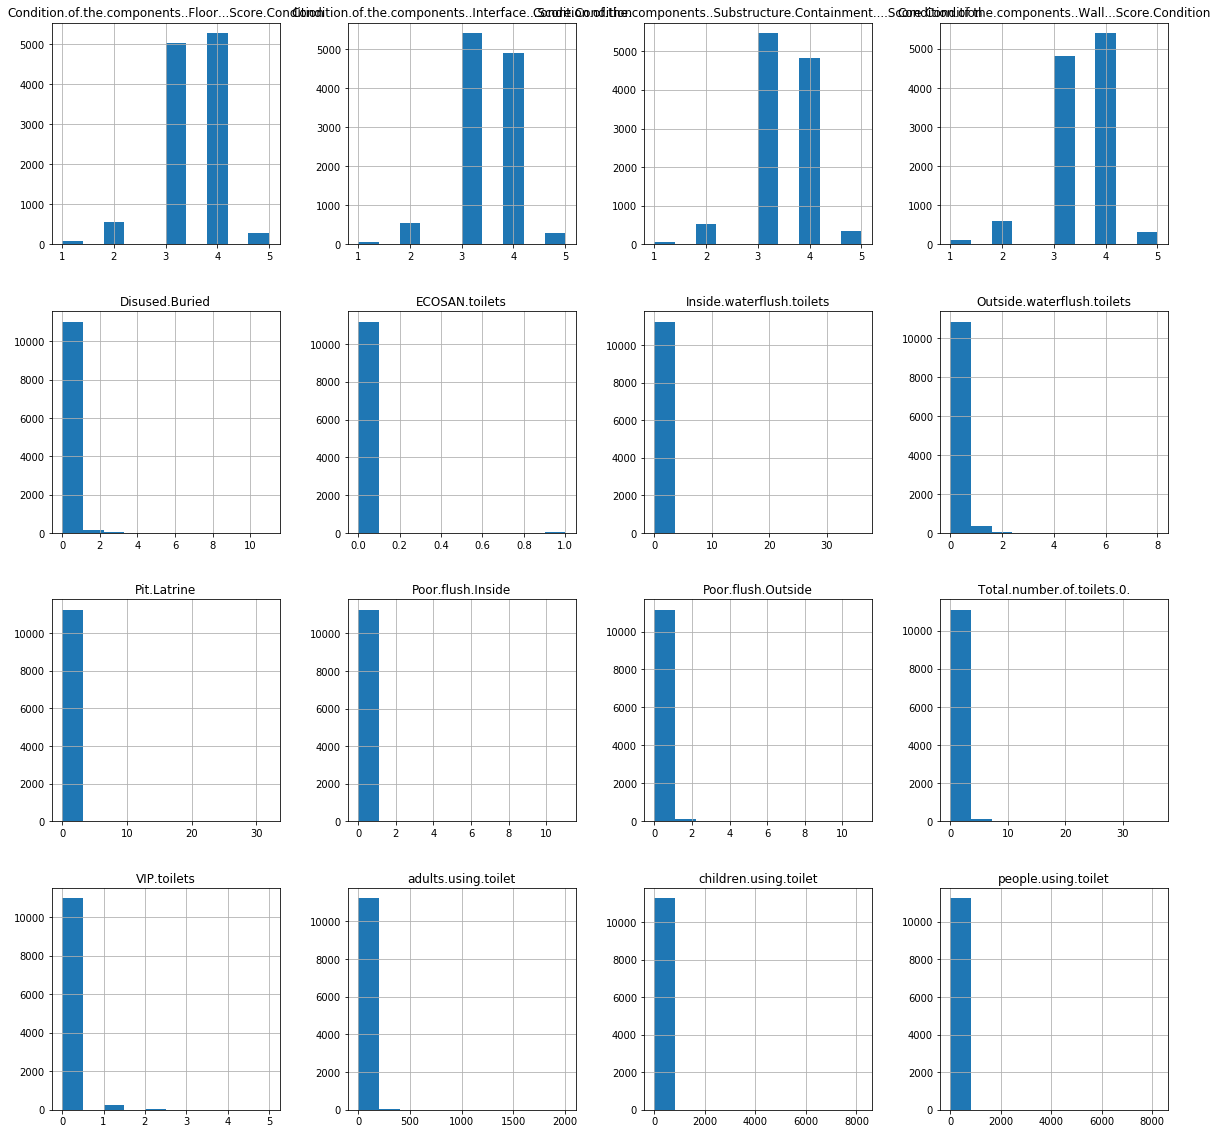

In [51]:
import matplotlib.pyplot as plt
Kanyama[Kanyama.dtypes[(Kanyama.dtypes=="float64")|(Kanyama.dtypes=="int64")]
                        .index.values].hist(figsize=[20,20])

Scaling all the values that are bigger than the interval [0,1]
Standardizing values that have outliers

in resume:

1. Number of people and toilets
2. Condition of the components (Roof, Wall, Floor, Interface, Substructure)

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

min_max=MinMaxScaler()
# Scaling down both train and test data set

Kanyama[[
    'Condition.of.the.components..Roof...Score.Condition',
    'Condition.of.the.components..Wall...Score.Condition',
    'Condition.of.the.components..Floor...Score.Condition',
    'Condition.of.the.components..Interface...Score.Condition',
    'Condition.of.the.components..Substructure.Containment....Score.Condition'
    ]] = min_max.fit_transform(
    Kanyama[[
    'Condition.of.the.components..Roof...Score.Condition',
    'Condition.of.the.components..Wall...Score.Condition',
    'Condition.of.the.components..Floor...Score.Condition',
    'Condition.of.the.components..Interface...Score.Condition',
    'Condition.of.the.components..Substructure.Containment....Score.Condition'
    ]])

Kanyama[[
        'VIP.toilets', 'ECOSAN.toilets',
        'Inside.waterflush.toilets', 'Outside.waterflush.toilets',
        'Poor.flush.Inside', 'Poor.flush.Outside', 'Pit.Latrine',
        'Disused.Buried', 'Total.number.of.toilets.0.', 'adults.using.toilet',
        'children.using.toilet', 'people.using.toilet'
    ]]=scale(
    Kanyama[[
        'VIP.toilets', 'ECOSAN.toilets',
        'Inside.waterflush.toilets', 'Outside.waterflush.toilets',
        'Poor.flush.Inside', 'Poor.flush.Outside', 'Pit.Latrine',
        'Disused.Buried', 'Total.number.of.toilets.0.', 'adults.using.toilet',
        'children.using.toilet', 'people.using.toilet'
    ]])


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:34: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


## One-hot encoding

Data with Boolean types (True or False) and text info has to be transformed into numbers, since Machine Learning models are a group of complex equations. If the column "Toilet Type" has the values "Pit Latrine", "Pour Flush" and "Flush Toilet" their one-hot encoding would be:

    Pit Latrine | Pour Flush | Flush Toilet
            0              0            1     ---> Flush Toilet
            0              1            0     ---> Pour Flush
            1              0            0     ---> Pit Latrine
           
Any toilet is going to have one of these three structures, being 1 on one column and 0 on the rest. Never having more than "1" on the other tables.

Rules: 

1. True or False elements should be only labeled transformed
2. Elements with more than 2 answer should receive the one-hot encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def label_encoding(data):
# define example
    label_data = np.empty((data.shape[0], 1))
    label_names = []
    for col in data:
        if data[col].dtypes=='object' or data[col].dtypes=='bool':
            
            # integer encode
            label_encoder = LabelEncoder()
            integer_encoded = label_encoder.fit_transform(data[col])
            # binary encode
            onehot_encoder = OneHotEncoder(sparse=False)
            integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
            onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

            #add a name to the table
            label_names.append([col + f'_{i}' for i in range(len(onehot_encoded[1]))])
            #add data to the array
            label_data = np.concatenate([label_data, onehot_encoded], axis = 1)

    label_data = label_data[:,1:]
    label_names = [item for sublist in label_names for item in sublist]
    label = pd.DataFrame(data = label_data, columns= label_names)
    return(label)

Kanyama_ML = label_encoding(Kanyama)

Kanyama_ML.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

Index(['RECORD.TYPE.OF.PROPERTY_0', 'RECORD.TYPE.OF.PROPERTY_1',
       'RECORD.TYPE.OF.PROPERTY_2', 'RECORD.TYPE.OF.PROPERTY_3',
       'RECORD.TYPE.OF.PROPERTY_4', 'RECORD.TYPE.OF.PROPERTY_5',
       'RECORD.TYPE.OF.PROPERTY_6', 'RECORD.TYPE.OF.PROPERTY_7',
       'Landlord.live.in.the.plot._0', 'Landlord.live.in.the.plot._1',
       'Interface.Layout_0', 'Interface.Layout_1', 'Interface.Layout_2',
       'Interface.Layout_3', 'Interface.Layout_4', 'Interface.Layout_5',
       'Interface.Layout_6', 'CONTAINMENT.SUBSTRUCTURE_0',
       'CONTAINMENT.SUBSTRUCTURE_1', 'CONTAINMENT.SUBSTRUCTURE_2',
       'CONTAINMENT.SUBSTRUCTURE_3', 'Perception.of.the.fill.level_0',
       'Perception.of.the.fill.level_1', 'Perception.of.the.fill.level_2',
       'Perception.of.the.fill.level_3', 'Perception.of.the.fill.level_4',
       'Is.washing.hand.basin.present._0', 'Is.washing.hand.basin.present._1',
       'Cleanliness.rate_0', 'Cleanliness.rate_1', 'Any.overflow.flooding._0',
       'Any.overfl

## Separating the label from the data

It is necessary to remove the label from the data to make the algorithm learn the predict values. for that is created a new Dataframe "Y", that contains all the labels necessary to say if a Toilet is clean or dirty

For the labeling:

- 1 = Clean
- 0 = Dirty


In [54]:
Y = (Kanyama_ML['Cleanliness.rate_0'])
Kanyama_ML.drop(columns=['Cleanliness.rate_0', 'Cleanliness.rate_1'], inplace= True)

## Splitting into train and test 

The train and test split are the point where the algorithm's efficiency is tested, where the training set is the data used for the model uses to find the similarities between the classes (Clean and Dirty) and the test set is focused on testing how the algorithm work with different kind of data, because without the test data, the model just "memorize" the answers, being totally useless with new data is added.

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Kanyama_ML, Y, test_size=0.1, random_state=0)

In [85]:
print(f'Train shape: {X_train.shape} and Test shape: {X_test.shape}')

Train shape: (10126, 42) and Test shape: (1126, 42)


## Decision Tree

The decision tree is a Machine Learning that shows a decision path to classify the data, it is one of the most intuitive algorithms in the Artificial Intelligence area, because it shows what decisions were done to get to that classification. 

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=1000, max_depth= 4, random_state=12, min_samples_split= 100)

clf.fit(X_train, Y_train)

importances = clf.feature_importances_

prediction = clf.predict(X_test)

accuracy = accuracy_score(Y_test, prediction)

print(f'Accuracy: {accuracy}')

print(f'Importances: {importances}')

Accuracy: 0.738898756660746
Importances: [1.40208181e-03 9.88545074e-05 9.29872707e-06 2.87641296e-05
 5.31471846e-04 3.23454672e-05 1.51872494e-03 2.55686051e-04
 1.95179033e-02 1.84439053e-02 1.55331364e-04 7.06995732e-04
 1.83573795e-02 3.63919774e-02 1.18169753e-01 4.01563753e-03
 1.33134699e-03 1.34513538e-04 4.50931944e-02 6.46349223e-02
 1.84297335e-03 5.08729609e-02 6.93861634e-02 1.92262929e-04
 1.81560738e-01 3.66917926e-02 2.91700271e-02 3.27351470e-02
 1.08749058e-02 1.03224178e-02 8.05188903e-02 8.51325451e-02
 6.69119016e-03 7.04550113e-03 1.92696261e-03 1.98544760e-03
 1.39760639e-02 1.17423418e-02 1.75790276e-02 1.71606330e-02
 9.24675497e-04 8.37244186e-04]


### Visualising the trees

In [87]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

estimator = clf.estimators_[25]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', feature_names = Kanyama_ML.columns, 
                class_names = ['Clean', 'Dirty'], 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png', height = '900')

## Ensemble Learning

Using more algorithms to reach a more stable result.

Using the previous Random forest and adding SVM, KNN, Logistic Regression

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Models

KNN = KNeighborsClassifier()
SVM = SVC(probability= True)
NB = GaussianNB()
LR = LogisticRegression()

model1 = VotingClassifier(estimators=[ ('knn', KNN), ('svm', SVM), ('gnb', NB), ('lr', LR)],
                        voting= 'soft')

model1.fit(X_train, Y_train)

model2 = VotingClassifier(estimators=[ ('knn', KNN), ('svm', SVM), ('gnb', NB), ('lr', LR)],
                        voting= 'hard')

model2.fit(X_train, Y_train)
# Fitting the models

# pred1 = KNN.fit(X_train, Y_train)
# pred2 = SVM.fit(X_train, Y_train)
# pred3 = NB.fit(X_train, Y_train)
# pred4 = LR.fit(X_train, Y_train)


# Obtaining the accuracy
pred=model1.predict_proba(X_test)


print(model1.score(X_test,Y_test))
print(model2.score(X_test,Y_test))
print(pred)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in

0.7317939609236235
0.7406749555950266
[[0.50610597 0.49389403]
 [0.48094154 0.51905846]
 [0.85417341 0.14582659]
 ...
 [0.25159102 0.74840898]
 [0.46746256 0.53253744]
 [0.17433106 0.82566894]]


## Stacking Algorithms

But this method does not increase accuracy, to make that is necessary to stack algorithms, a way more complex method

The first method to be used is AdaBoost, a simple definition is described by sklearn:

_"The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction."_


In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

Ada = AdaBoostClassifier(n_estimators= 1000)
scores = cross_val_score(Ada, Kanyama_ML, Y, cv= 10)
scores.mean()


0.7309868120214043

The second method is called extremely randomized trees and the description below by sklearn explains the difference between them and the Random Forest method:

_"In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule."_

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=1000, min_samples_split=100, random_state=12)
scores = cross_val_score(clf, Kanyama_ML, Y, cv=10)
scores.mean()

0.7335683830971038

### XGBoost

In [91]:
! pip install xgboost

In [92]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=1,learning_rate=0.01, n_estimators= 1000)
XGB.fit(X_train, Y_train)

prediction = XGB.predict(X_test)

accuracy = accuracy_score(Y_test, prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7442273534635879


## Summary ML algorithms

Most algorithms obtained an accuracy of approximately 75%, which is not bad, but far from desired for a solid real world application. The problem could be:

1. Not Enought data
2. Columns not offering enough info
3. Some columns could be 'destroying' the accuracy
4. Data pre-processing not good enough

For the next steps, Neural networks are going to be applied in an attempt to boost the accuracy.

It is also good to mention that although the accuracy is not good enough, the overfitting problem is being well supressed, by validation methods, sampling changes and always using the accuracy's mean over lots of iterations

In [93]:
Kanyama_ML.shape[1]

42

In [101]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(Kanyama_ML.shape[1], input_shape=(Kanyama_ML.shape[1],)))
model.add(LeakyReLU())
model.add(Dropout(rate = 0.2))
model.add(Dense(512))
model.add(LeakyReLU())
#model.add(Dropout(rate = 0.2))
#model.add(Dense(128))
#model.add(LeakyReLU())
#model.add(Dropout(rate = 0.2))
#model.add(Dense(512))
#model.add(LeakyReLU())
#model.add(Dropout(rate = 0.3))
#model.add(Dense(128))
#model.add(LeakyReLU())
#model.add(Dropout(rate = 0.2))
#model.add(Dense(32))
#model.add(LeakyReLU())
model.add(Dense(1, activation = 'sigmoid'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 42)                1806      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 42)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               22016     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 513       
Total params: 24,335
Trainable params: 24,335
Non-trainable params: 0
_________________________________________________________________


In [102]:
from keras import optimizers

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=256)

Epoch 1/100
10126/10126 [==============================] - 3s 336us/step - loss: 0.6314 - acc: 0.6822
Epoch 2/100
10126/10126 [==============================] - 2s 178us/step - loss: 0.6130 - acc: 0.6917
Epoch 3/100
10126/10126 [==============================] - 1s 147us/step - loss: 0.6050 - acc: 0.6919
Epoch 4/100
10126/10126 [==============================] - 1s 148us/step - loss: 0.6028 - acc: 0.6927
Epoch 5/100
10126/10126 [==============================] - 1s 139us/step - loss: 0.5975 - acc: 0.6937
Epoch 6/100
10126/10126 [==============================] - 1s 138us/step - loss: 0.5931 - acc: 0.6959
Epoch 7/100
10126/10126 [==============================] - 2s 199us/step - loss: 0.5907 - acc: 0.6957
Epoch 8/100
10126/10126 [==============================] - 2s 195us/step - loss: 0.5884 - acc: 0.7001
Epoch 9/100
10126/10126 [==============================] - 1s 140us/step - loss: 0.5845 - acc: 0.6980
Epoch 10/100
10126/10126 [==============================] - 1s 147us/step - loss: 

In [104]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=1)

print(f'Accuracy: {loss_and_metrics[1]}')
print(f'Loss: {loss_and_metrics[0]}')

1126/1126 [==============================] - 8s 7ms/step
Accuracy: 0.7415630550621669
Loss: 0.5241769124484136


## Clustering

Since all the methods were stabilized on 75%, it is time to cluster the dataset, clustering means that the machine is going to group elements according to their attributes, in a unserpivisioned way, that means without having an parameter to measure efficiency.

